In [6]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'./NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.family': 'NanumGothic'}) # 폰트 설정
plt.rcParams.update({'axes.unicode_minus': False }) # Minus Unicode False

f = [f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]
f

['NanumGothic',
 'NanumGothic',
 'NanumSquare_ac',
 'NanumSquareOTF_ac',
 'NanumSquare',
 'NanumSquareOTF_ac',
 'NanumSquareOTF_ac',
 'NanumSquareOTF_ac',
 'NanumSquare_ac',
 'NanumSquare_ac',
 'NanumSquare',
 'NanumSquareOTF',
 'NanumSquareOTF',
 'NanumSquare_ac',
 'NanumSquareOTF',
 'NanumSquare',
 'NanumSquareOTF',
 'NanumSquareOTF',
 'NanumSquareOTF_ac',
 'NanumSquare']

In [8]:
finance_datas = pd.read_csv('data/data_preprocessing_unified_including_others.csv', sep=',', encoding='utf-8', dtype={'종목코드':str, '분기':int})

finance_datas

,종목코드,년도,분기,배당금지급,유동자산,유동부채,영업이익(손실),수익(매출액),당기순이익(손실),자본총계,...,순이익률,자본회전율,AltmanZScore,log(AltmanZScore),부채비율,PER,PSR,log(PSR),PBR,log(PBR)
0,000020,2020.0,1,3.312928e+09,2.379160e+11,5.601470e+10,2.706892e+09,6.700367e+10,2.259000e+09,2.994870e+11,...,0.033715,0.223728,2.600444,0.955682,0.256100,80.987644,2.730463,1.004471,0.610881,-0.492853
1,000950,2020.0,1,0.000000e+00,4.445098e+10,2.139210e+11,-3.642227e+09,2.840698e+10,-7.534318e+09,1.237910e+11,...,-0.265228,0.229475,0.998174,-0.001828,2.126584,-2.575415,0.683071,-0.381156,0.156749,-1.853108
2,001540,2020.0,1,0.000000e+00,1.473480e+11,5.060352e+10,2.657248e+09,3.777548e+10,2.329921e+09,1.491430e+11,...,0.061678,0.253284,2.543271,0.933451,0.428419,53.123087,3.276533,1.186786,0.829896,-0.186455
3,001790,2020.0,1,6.212995e+09,5.346720e+11,4.020430e+11,7.324572e+09,2.836740e+11,1.456410e+08,4.575730e+11,...,0.000513,0.619954,1.433388,0.360041,1.520033,970.002003,0.498008,-0.697138,0.308741,-1.175251
4,002230,2020.0,1,0.000000e+00,9.711871e+10,2.172407e+10,-3.697193e+08,1.134262e+10,-2.315460e+09,1.336150e+11,...,-0.204138,0.084890,2.170490,0.774953,0.198200,-22.671312,4.628076,1.532141,0.392880,-0.934250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341,383220,2023.0,3,6.102839e+10,7.170640e+11,4.755630e+11,1.485240e+11,4.928150e+11,1.190810e+11,1.221050e+12,...,0.241634,0.403599,6.013897,1.794073,0.461604,36.350893,8.783622,2.172889,3.545067,1.265557
3342,405100,2023.0,3,5.737761e+09,7.099587e+10,8.948139e+09,1.729899e+09,1.500569e+10,1.754362e+09,1.018220e+11,...,0.116913,0.147372,4.224467,1.440893,0.280754,90.063126,10.529557,2.354186,1.551759,0.439389
3343,425040,2023.0,3,4.249243e+09,1.721390e+11,6.219917e+10,3.685606e+09,2.418480e+10,4.575588e+09,1.681180e+11,...,0.189193,0.143856,4.889058,1.587000,0.423999,91.152190,17.245329,2.847541,2.480844,0.908599
3344,900070,2023.0,3,4.103465e+06,5.672710e+08,1.290003e+08,9.139425e+06,1.489769e+08,4.868978e+06,6.494237e+08,...,0.032683,0.229399,108.326015,4.685145,0.288419,6865.660103,224.388821,5.413380,51.474478,3.941086


In [9]:
def remove_outliers(df, threshold=1.5):
    """
    이상치를 제거하는 함수.
    
    Parameters:
    df (DataFrame): 이상치를 제거할 데이터프레임.
    columns (list): 이상치를 제거할 열의 리스트.
    threshold (float): 이상치를 식별하는 데 사용되는 표준편차의 배수. 기본값은 1.5.
    
    Returns:
    DataFrame: 이상치가 제거된 데이터프레임.
    """
    df_out = df.copy()
    for col in df.columns:
        # 이상치 식별을 위해 IQR 계산
        q1 = df_out[col].quantile(0.25)
        q3 = df_out[col].quantile(0.75)
        iqr = q3 - q1
        # 이상치 경계 계산
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        # 이상치 제거
        df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
    return df_out


def apply_standard_scaler(df):
    SS = StandardScaler()
    return pd.DataFrame(SS.fit_transform(df), columns=df.columns)

In [10]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 모멘텀지표 분석
X_train = finance_datas[['TSF_SLOPE', '배당수익률', '순이익률', '자본회전율']] # 'AltmanZScore' 제외 (수치 이상)
X_train = pd.DataFrame(X_train)

# 이상치 제거
X_train = remove_outliers(X_train)

# 정규분포 스케일링 적용
#SS = StandardScaler()
#X_train = apply_standard_scaler(X_train)

print(X_train)

      TSF_SLOPE     배당수익률      순이익률     자본회전율
0        -0.332  0.018108  0.033715  0.223728
2        -0.310  0.000000  0.061678  0.253284
3        -0.184  0.043979  0.000513  0.619954
6        -0.449  0.000000  0.061755  0.306139
7        -0.480  0.004086 -0.025454  0.985946
...         ...       ...       ...       ...
3340     -0.198  0.011106 -0.089024  0.139655
3341      0.004  0.014099  0.241634  0.403599
3342      0.058  0.036314  0.116913  0.147372
3343     -0.301  0.010188  0.189193  0.143856
3344     -0.169  0.000123  0.032683  0.229399

[2449 rows x 4 columns]


In [11]:
X_train.corr()

,TSF_SLOPE,배당수익률,순이익률,자본회전율
TSF_SLOPE,1.000000,0.020777,0.052186,0.104521
배당수익률,0.020777,1.000000,0.096657,0.050597
순이익률,0.052186,0.096657,1.000000,-0.249091
자본회전율,0.104521,0.050597,-0.249091,1.000000


TSF_SLOPE


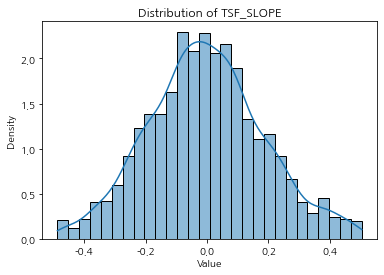

배당수익률


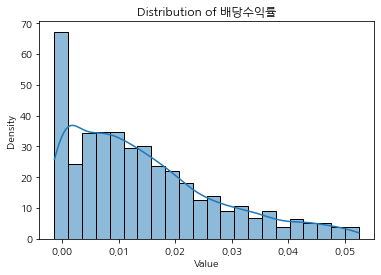

순이익률


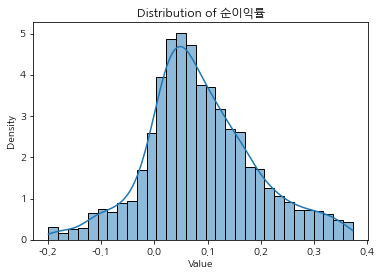

자본회전율


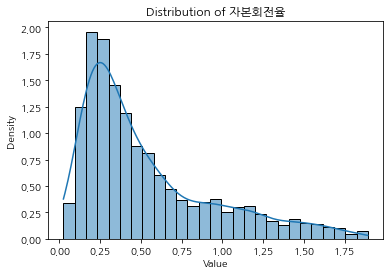

In [12]:
# 각 열에 대한 분포 표현
for col in X_train.columns:
    print(col)
    sns.histplot(X_train[col], kde=True, stat='density')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

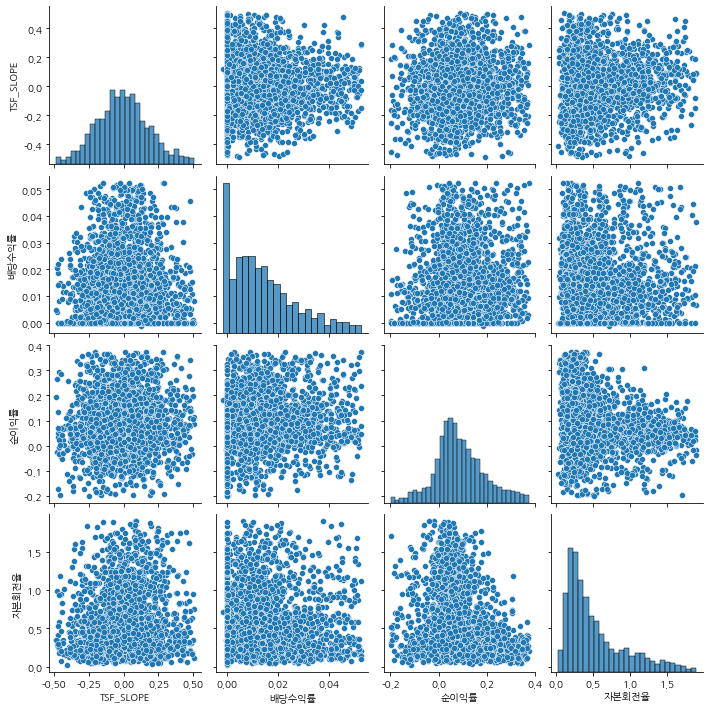

In [13]:
sns.pairplot(X_train)
plt.show()

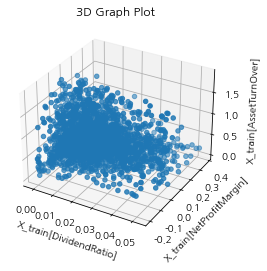

In [14]:
# 데이터 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 데이터 포인트를 3D 공간에 점으로 표시
ax.scatter(X_train['배당수익률'], X_train['순이익률'], X_train['자본회전율'], marker='o')

# 그래프에 제목과 레이블 추가
ax.set_title('3D Graph Plot')
ax.set_xlabel('X_train[DividendRatio]')
ax.set_ylabel('X_train[NetProfitMargin]')
ax.set_zlabel('X_train[AssetTurnOver]')

# 그래프 표시
plt.show()

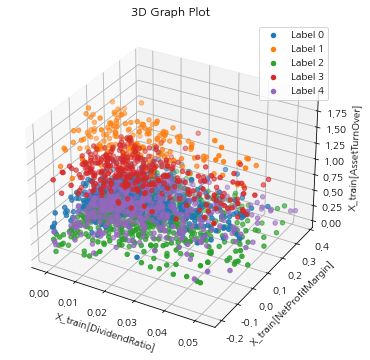

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# KMeans 군집화 수행 (군집 5개에 대한 분석)
n_clusters=5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
X_train_kmeans = kmeans.fit_predict(X_train)

# 각 군집에 대해 새로운 레이블 할당
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(X_train_kmeans)

# 3차원 플롯 설정
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 각 레이블에 따라 다른 색으로 플롯
for label in range(0, n_clusters):
    indices = (y_train == label)
    ax.scatter(X_train.loc[indices, '배당수익률'], X_train.loc[indices, '순이익률'], X_train.loc[indices, '자본회전율'], label=f'Label {label}')

# 그래프에 제목과 레이블 추가
ax.set_title('3D Graph Plot')
ax.set_xlabel('X_train[DividendRatio]')
ax.set_ylabel('X_train[NetProfitMargin]')
ax.set_zlabel('X_train[AssetTurnOver]')

# 범례 표시
ax.legend()

# 플롯 표시
plt.show()

In [16]:
# 클러스터링된 데이터 분포 확인을 위한 데이터프레임 생성

filtered = ['배당수익률', '순이익률', '자본회전율']
clustered_datas = X_train[filtered]
clustered_datas = pd.DataFrame(clustered_datas, columns=filtered)
clustered_datas['label'] = y_train

print(clustered_datas)

         배당수익률      순이익률     자본회전율  label
0     0.018108  0.033715  0.223728      2
2     0.000000  0.061678  0.253284      2
3     0.043979  0.000513  0.619954      0
6     0.000000  0.061755  0.306139      2
7     0.004086 -0.025454  0.985946      3
...        ...       ...       ...    ...
3340  0.011106 -0.089024  0.139655      2
3341  0.014099  0.241634  0.403599      4
3342  0.036314  0.116913  0.147372      2
3343  0.010188  0.189193  0.143856      2
3344  0.000123  0.032683  0.229399      2

[2449 rows x 4 columns]


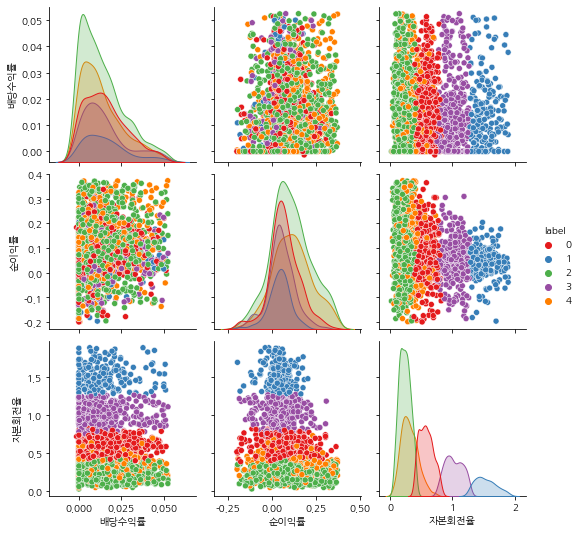

In [17]:
sns.pairplot(clustered_datas, hue='label', palette='Set1')

In [18]:
"""
자본회전율에 대한 군집 형성이 잘 되고 있는 상황이고, 다른 피쳐들에 대해서는 구분이 되고 있지 않는 상황이다.
따라서, 해당 군집 알고리즘으로 라벨링하는 것은 포기하고, 주어진 정보에 대하여 백분율 정보를 바탕으로 전반적인 바운더리에 대해 학습하도록 한다.
대부분 정규분포로 형성하여 백분율을 바탕으로 데이터를 구성한 뒤 어떤 위치에 속한 종목인지를 알 수 있도록 한다.
"""

'\n자본회전율에 대한 군집 형성이 잘 되고 있는 상황이고, 다른 피쳐들에 대해서는 구분이 되고 있지 않는 상황이다.\n따라서, 해당 군집 알고리즘으로 라벨링하는 것은 포기하고, 주어진 정보에 대하여 백분율 정보를 바탕으로 전반적인 바운더리에 대해 학습하도록 한다.\n대부분 정규분포로 형성하여 백분율을 바탕으로 데이터를 구성한 뒤 어떤 위치에 속한 종목인지를 알 수 있도록 한다.\n'

In [19]:
finance_datas = pd.read_csv('data/data_preprocessing_unified_including_others_and_percentile.csv', sep=',', encoding='utf-8', dtype={'종목코드':str, '분기':int})

finance_datas

,종목코드,년도,분기,배당금지급,유동자산,유동부채,영업이익(손실),수익(매출액),당기순이익(손실),자본총계,...,avg_of_변동성지표_percentile,avg_of_수익성지표_percentile,avg_of_안정성지표_percentile,avg_of_가치성지표_percentile,avg_of_모멘텀지표_percentile,변동성지표_percentile,수익성지표_percentile,안정성지표_percentile,가치성지표_percentile,모멘텀지표_percentile
0,000020,2020.0,1,3.312928e+09,2.379160e+11,5.601470e+10,2.706892e+09,6.700367e+10,2.259000e+09,2.994870e+11,...,0.533622,0.415920,0.228631,0.435595,0.039450,0.533622,0.285415,0.228631,0.424985,0.039450
1,000950,2020.0,1,0.000000e+00,4.445098e+10,2.139210e+11,-3.642227e+09,2.840698e+10,-7.534318e+09,1.237910e+11,...,0.617155,0.119396,0.930663,0.093545,0.041094,0.617155,0.016139,0.930663,0.054991,0.041094
2,001540,2020.0,1,0.000000e+00,1.473480e+11,5.060352e+10,2.657248e+09,3.777548e+10,2.329921e+09,1.491430e+11,...,0.720114,0.279289,0.410341,0.543036,0.049163,0.720114,0.092947,0.410341,0.559325,0.049163
3,001790,2020.0,1,6.212995e+09,5.346720e+11,4.020430e+11,7.324572e+09,2.836740e+11,1.456410e+08,4.575730e+11,...,0.477286,0.591452,0.844292,0.104453,0.154961,0.477286,0.686940,0.844292,0.062762,0.154961
4,002230,2020.0,1,0.000000e+00,9.711871e+10,2.172407e+10,-3.697193e+08,1.134262e+10,-2.315460e+09,1.336150e+11,...,0.684250,0.045776,0.160191,0.436491,0.014644,0.684250,0.003288,0.160191,0.427376,0.014644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341,383220,2023.0,3,6.102839e+10,7.170640e+11,4.755630e+11,1.485240e+11,4.928150e+11,1.190810e+11,1.221050e+12,...,0.505081,0.643853,0.440227,0.908398,0.498057,0.505081,0.811417,0.440227,0.937537,0.498057
3342,405100,2023.0,3,5.737761e+09,7.099587e+10,8.948139e+09,1.729899e+09,1.500569e+10,1.754362e+09,1.018220e+11,...,0.663628,0.545029,0.257322,0.823819,0.611327,0.663628,0.572475,0.257322,0.864913,0.611327
3343,425040,2023.0,3,4.249243e+09,1.721390e+11,6.219917e+10,3.685606e+09,2.418480e+10,4.575588e+09,1.681180e+11,...,0.786312,0.451783,0.404662,0.922445,0.052451,0.786312,0.351166,0.404662,0.948147,0.052451
3344,900070,2023.0,3,4.103465e+06,5.672710e+08,1.290003e+08,9.139425e+06,1.489769e+08,4.868978e+06,6.494237e+08,...,0.533622,0.247061,0.265690,0.996115,0.176330,0.533622,0.069038,0.265690,0.996115,0.176330


In [20]:
# 각 지표별 상관관계 분석

finance_datas_corr = finance_datas[['변동성지표_percentile', '수익성지표_percentile', '안정성지표_percentile', '가치성지표_percentile', '모멘텀지표_percentile']].corr()
finance_datas_corr

,변동성지표_percentile,수익성지표_percentile,안정성지표_percentile,가치성지표_percentile,모멘텀지표_percentile
변동성지표_percentile,1.000000,-0.279420,0.183757,0.273790,0.207999
수익성지표_percentile,-0.279420,1.000000,0.036613,-0.350473,0.078953
안정성지표_percentile,0.183757,0.036613,1.000000,-0.217983,0.015719
가치성지표_percentile,0.273790,-0.350473,-0.217983,1.000000,0.044264
모멘텀지표_percentile,0.207999,0.078953,0.015719,0.044264,1.000000


In [21]:
"""
상관관계가 가장 높은 셀에 대해서 내림차순으로 정렬한 것이다.
--> 가치성지표, 변동성지표, 수익성지표, 안정성지표, 모멘텀지표

가설 : 상관관계(피쳐 누적합)가 낮은 지표를 위주로 구성하는 것이 설명력을 높일 수 있는 방안이라고 생각된다.
"""

finance_datas_corr.abs().sum().sort_values(ascending=False)

변동성지표_percentile    1.944966
가치성지표_percentile    1.886510
수익성지표_percentile    1.745459
안정성지표_percentile    1.454072
모멘텀지표_percentile    1.346935
dtype: float64

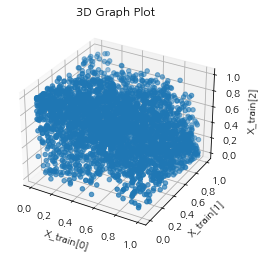

In [22]:
import matplotlib.pyplot as plt

# 데이터 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 데이터 포인트를 3D 공간에 점으로 표시
# 변동성지표_percentile 수익성지표_percentile 안정성지표_percentile 가치성지표_percentile 모멘텀지표_percentile
ax.scatter(finance_datas['가치성지표_percentile'], finance_datas['변동성지표_percentile'], finance_datas['수익성지표_percentile'], marker='o')

# 그래프에 제목과 레이블 추가
ax.set_title('3D Graph Plot')
ax.set_xlabel('X_train[0]')
ax.set_ylabel('X_train[1]')
ax.set_zlabel('X_train[2]')

# 그래프 표시
plt.show()

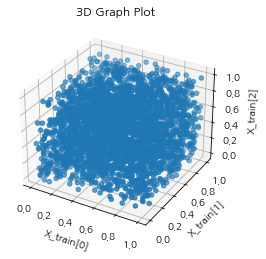

In [23]:
import matplotlib.pyplot as plt

# 데이터 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 데이터 포인트를 3D 공간에 점으로 표시
# 변동성지표_percentile 수익성지표_percentile 안정성지표_percentile 가치성지표_percentile 모멘텀지표_percentile
ax.scatter(finance_datas['모멘텀지표_percentile'], finance_datas['안정성지표_percentile'], finance_datas['수익성지표_percentile'], marker='o')

# 그래프에 제목과 레이블 추가
ax.set_title('3D Graph Plot')
ax.set_xlabel('X_train[0]')
ax.set_ylabel('X_train[1]')
ax.set_zlabel('X_train[2]')

# 그래프 표시
plt.show()

In [24]:
"""
작성자 : DevTae (김태현)

각 피쳐들에 대한 분석을 진행하고자 한다.
"""

'\n작성자 : DevTae (김태현)\n\n각 피쳐들에 대한 분석을 진행하고자 한다.\n'

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

finance_datas = pd.read_csv('data/data_preprocessing_unified_including_others_and_percentile.csv', sep=',', encoding='utf-8', dtype={'종목코드':str, '분기':int})

finance_datas

,종목코드,년도,분기,배당금지급,유동자산,유동부채,영업이익(손실),수익(매출액),당기순이익(손실),자본총계,...,avg_of_변동성지표_percentile,avg_of_수익성지표_percentile,avg_of_안정성지표_percentile,avg_of_가치성지표_percentile,avg_of_모멘텀지표_percentile,변동성지표_percentile,수익성지표_percentile,안정성지표_percentile,가치성지표_percentile,모멘텀지표_percentile
0,000020,2020.0,1,3.312928e+09,2.379160e+11,5.601470e+10,2.706892e+09,6.700367e+10,2.259000e+09,2.994870e+11,...,0.533622,0.415920,0.228631,0.435595,0.039450,0.533622,0.285415,0.228631,0.424985,0.039450
1,000950,2020.0,1,0.000000e+00,4.445098e+10,2.139210e+11,-3.642227e+09,2.840698e+10,-7.534318e+09,1.237910e+11,...,0.617155,0.119396,0.930663,0.093545,0.041094,0.617155,0.016139,0.930663,0.054991,0.041094
2,001540,2020.0,1,0.000000e+00,1.473480e+11,5.060352e+10,2.657248e+09,3.777548e+10,2.329921e+09,1.491430e+11,...,0.720114,0.279289,0.410341,0.543036,0.049163,0.720114,0.092947,0.410341,0.559325,0.049163
3,001790,2020.0,1,6.212995e+09,5.346720e+11,4.020430e+11,7.324572e+09,2.836740e+11,1.456410e+08,4.575730e+11,...,0.477286,0.591452,0.844292,0.104453,0.154961,0.477286,0.686940,0.844292,0.062762,0.154961
4,002230,2020.0,1,0.000000e+00,9.711871e+10,2.172407e+10,-3.697193e+08,1.134262e+10,-2.315460e+09,1.336150e+11,...,0.684250,0.045776,0.160191,0.436491,0.014644,0.684250,0.003288,0.160191,0.427376,0.014644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341,383220,2023.0,3,6.102839e+10,7.170640e+11,4.755630e+11,1.485240e+11,4.928150e+11,1.190810e+11,1.221050e+12,...,0.505081,0.643853,0.440227,0.908398,0.498057,0.505081,0.811417,0.440227,0.937537,0.498057
3342,405100,2023.0,3,5.737761e+09,7.099587e+10,8.948139e+09,1.729899e+09,1.500569e+10,1.754362e+09,1.018220e+11,...,0.663628,0.545029,0.257322,0.823819,0.611327,0.663628,0.572475,0.257322,0.864913,0.611327
3343,425040,2023.0,3,4.249243e+09,1.721390e+11,6.219917e+10,3.685606e+09,2.418480e+10,4.575588e+09,1.681180e+11,...,0.786312,0.451783,0.404662,0.922445,0.052451,0.786312,0.351166,0.404662,0.948147,0.052451
3344,900070,2023.0,3,4.103465e+06,5.672710e+08,1.290003e+08,9.139425e+06,1.489769e+08,4.868978e+06,6.494237e+08,...,0.533622,0.247061,0.265690,0.996115,0.176330,0.533622,0.069038,0.265690,0.996115,0.176330


ATR


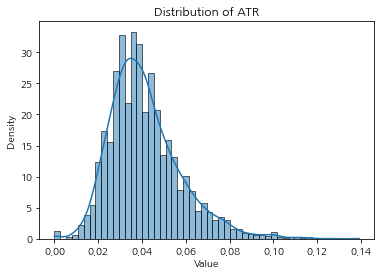

자본회전율


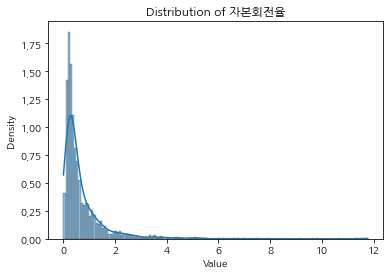

순이익률


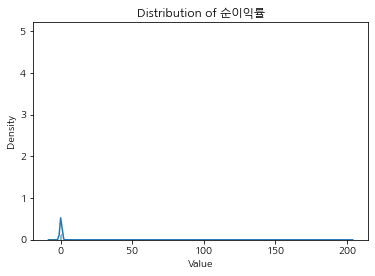

배당수익률


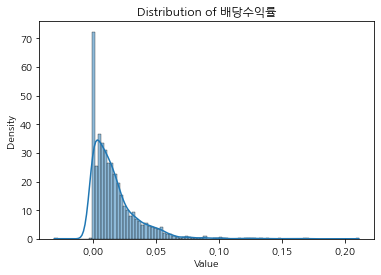

부채비율


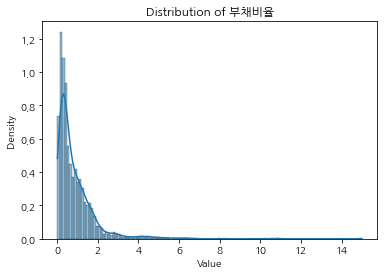

TSF_SLOPE


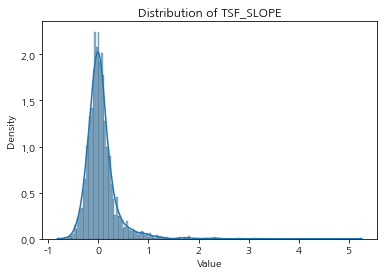

In [26]:
some_datas = finance_datas[['ATR', '자본회전율', '순이익률', '배당수익률', '부채비율', 'TSF_SLOPE']]

# 각 열에 대한 분포 표현
for col in some_datas.columns:
    print(col)
    sns.histplot(some_datas[col], kde=True, stat='density')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

PBR


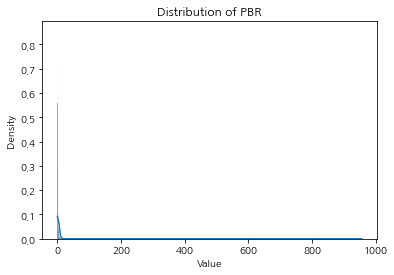

PSR


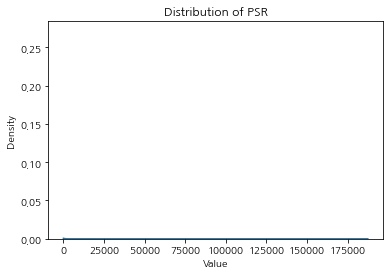

In [27]:
some_datas = finance_datas[['PBR', 'PSR']]

# 각 열에 대한 분포 표현
for col in some_datas.columns:
    print(col)
    sns.histplot(some_datas[col], kde=True, stat='density')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

log(PBR)


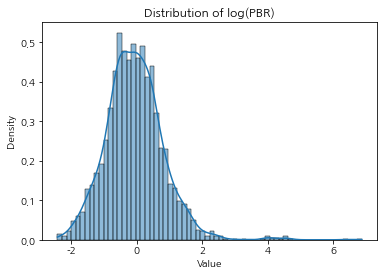

log(PSR)


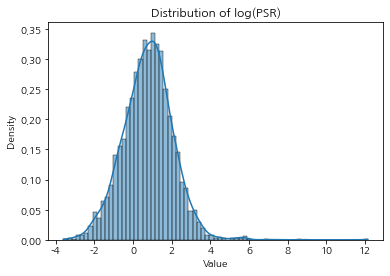

In [28]:
some_datas = finance_datas[['log(PBR)', 'log(PSR)']]

# 각 열에 대한 분포 표현
for col in some_datas.columns:
    print(col)
    sns.histplot(some_datas[col], kde=True, stat='density')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()